In [39]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
path_data = r'C:\Users\svalb\OneDrive\Documentos\GitHub\sci-abstract-graphs\subsetPapersKeywordsData.tsv'

In [41]:
df=pd.read_csv(path_data, sep="\t")

In [44]:
df.head(5)

,MeshHeadings
0,"Adult, Africa, Aged, Biomarkers, Carcinoma, He..."
1,Antineoplastic Combined Chemotherapy Protocols...
2,"Amino Acid Sequence, Animals, Binding Sites, C..."
3,"Adult, Aflatoxins, Aged, Carcinoma, Hepatocell..."
4,"Animals, Cell Division, Dose-Response Relation..."


In [56]:
keywords_split = []

In [57]:
for el in range(0, len(df)):
    keywords_split.append(df.iloc[el][0].lower().split(','))

C:\Users\svalb\AppData\Local\Temp\ipykernel_36224\3744446930.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  keywords_split.append(df.iloc[el][0].lower().split(','))


In [58]:
G = nx.Graph()

In [59]:
for keywords in keywords_split:
    for combination in itertools.combinations(keywords, 2):
        if G.has_edge(combination[0], combination[1]) or G.has_edge(combination[1], combination[0]):
            G[combination[0]][combination[1]]['weight'] += 1
        else:
            G.add_edge(combination[0], combination[1], weight = 1)

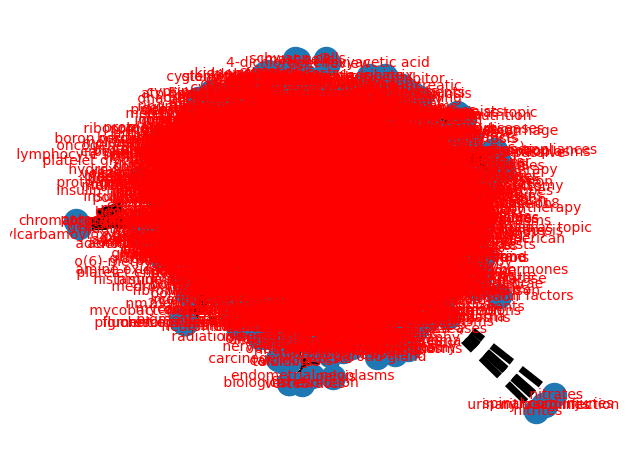

In [67]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 10]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 10]

pos = nx.spring_layout(G, seed=7)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=5, style="dashed")

nx.draw_networkx_labels(G, pos, font_size=10, font_color="r", font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=10, font_color="r")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [119]:
threshold_weight = 150

nodes_to_keep = set()
for u, v, data in G.edges(data=True):
    if data['weight'] > threshold_weight:
        nodes_to_keep.update([u, v])

In [120]:
nodes_to_keep

{' 80 and over',
 ' aged',
 ' carcinoma',
 ' cultured',
 ' female',
 ' humans',
 ' leukemia',
 ' male',
 ' middle aged',
 ' tumor cells',
 'adult'}

In [121]:
H = G.subgraph(nodes_to_keep)

In [122]:
H = nx.Graph(H)
self_loops = list(nx.selfloop_edges(H))
H.remove_edges_from(self_loops)    

In [126]:
elarge_3 = [(u, v) for (u, v, d) in H.edges(data=True) if d["weight"] > 200]
esmall_3 = [(u, v) for (u, v, d) in H.edges(data=True) if d["weight"] <= 200 and d["weight"] >100]
edge_labels = nx.get_edge_attributes(H, "weight")
edge_labels_2 = edge_labels.copy()
for key in edge_labels.keys():
    if edge_labels[key] <= 100:
        edge_labels_2.pop(key)

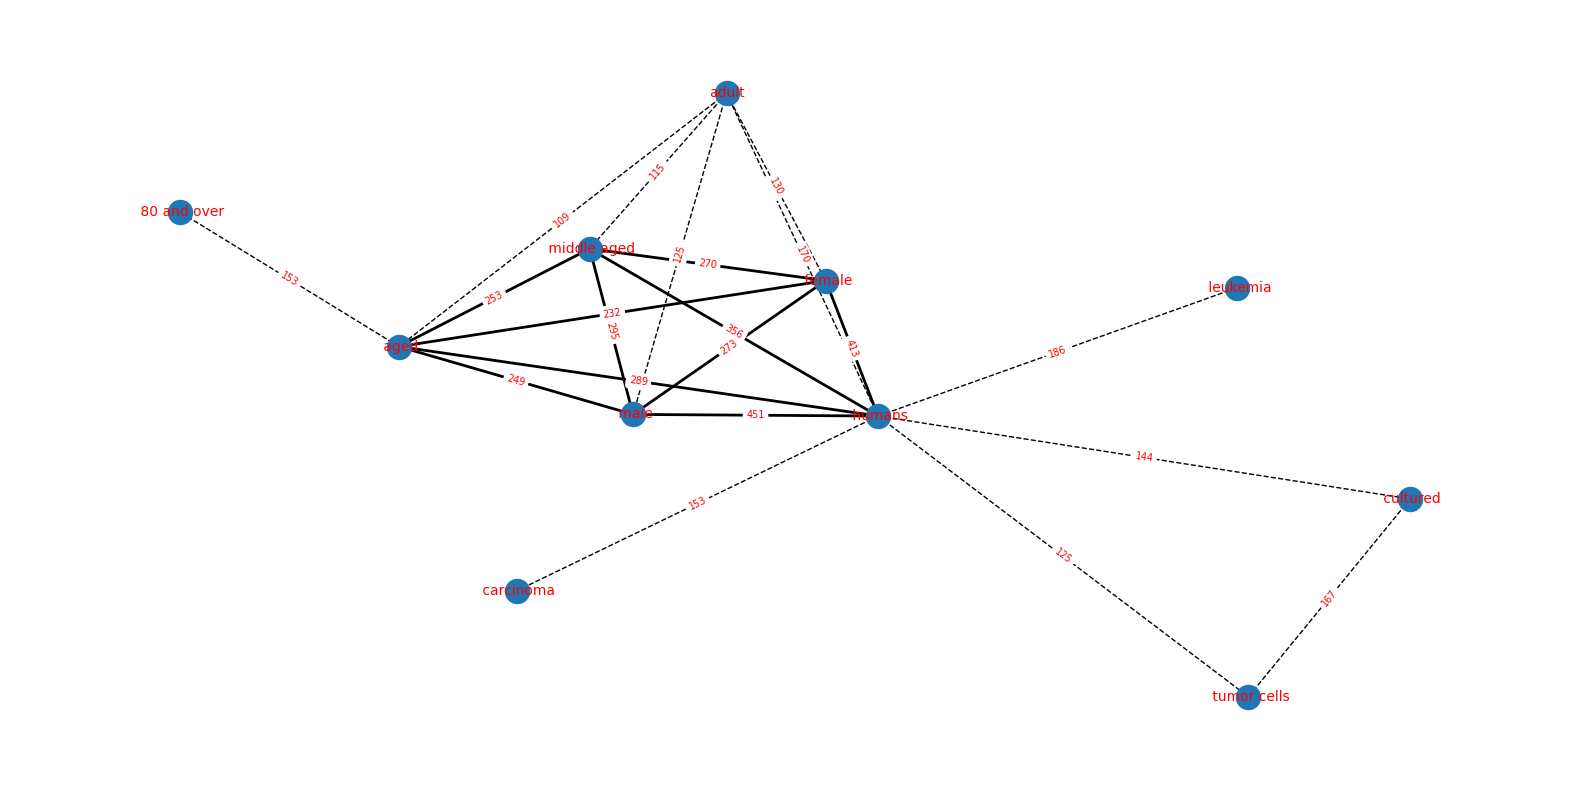

In [127]:
plt.figure(figsize=(16, 8))
pos = nx.spring_layout(H, seed=7)

nx.draw_networkx_nodes(H, pos)
nx.draw_networkx_edges(H, pos, edgelist=elarge_3, width=2)
nx.draw_networkx_edges(H, pos, edgelist=esmall_3, width=1, style="dashed")

nx.draw_networkx_labels(H, pos, font_size=10, font_color="r", font_family="sans-serif")
# edge weight labels

nx.draw_networkx_edge_labels(H, pos, edge_labels_2, font_size=7, font_color="r")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()